In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'character-predictions.csv')

In [3]:
df.head()

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   actual             1946 non-null   int64  
 2   pred               1946 non-null   int64  
 3   alive              1946 non-null   float64
 4   plod               1946 non-null   float64
 5   name               1946 non-null   object 
 6   title              938 non-null    object 
 7   male               1946 non-null   int64  
 8   culture            677 non-null    object 
 9   dateOfBirth        433 non-null    float64
 10  DateoFdeath        444 non-null    float64
 11  mother             21 non-null     object 
 12  father             26 non-null     object 
 13  heir               23 non-null     object 
 14  house              1519 non-null   object 
 15  spouse             276 non-null    object 
 16  book1              1946 

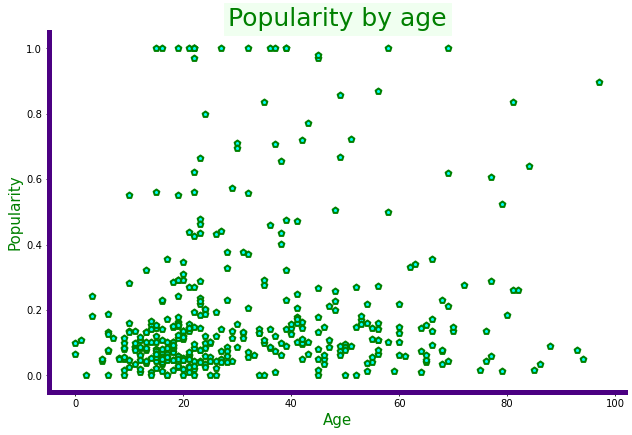

In [57]:
#Take data points where the absolute values of the ages are less than 100
df1 = df.loc[abs(df['age'])<100] 

# Connection between age and popularity:
fig, ax = plt.subplots(figsize = (8,5))
ax = fig.add_axes([0,0,1,1])

plt.scatter(x=df1['age'],y=df1['popularity'],color='cyan',edgecolors='green',
                linewidths=2,marker = 'p')

plt.title('Popularity by age',fontsize = 25, color = 'green', backgroundcolor = 'honeydew')
ax.set_ylabel('Popularity',color ='green',size = "15") 
ax.set_xlabel('Age',color ='Green',size = "15") 


for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(5)
    ax.spines[axis].set_color("indigo")
for axi in ['top','right']:  
    ax.spines[axi].set_color(None)

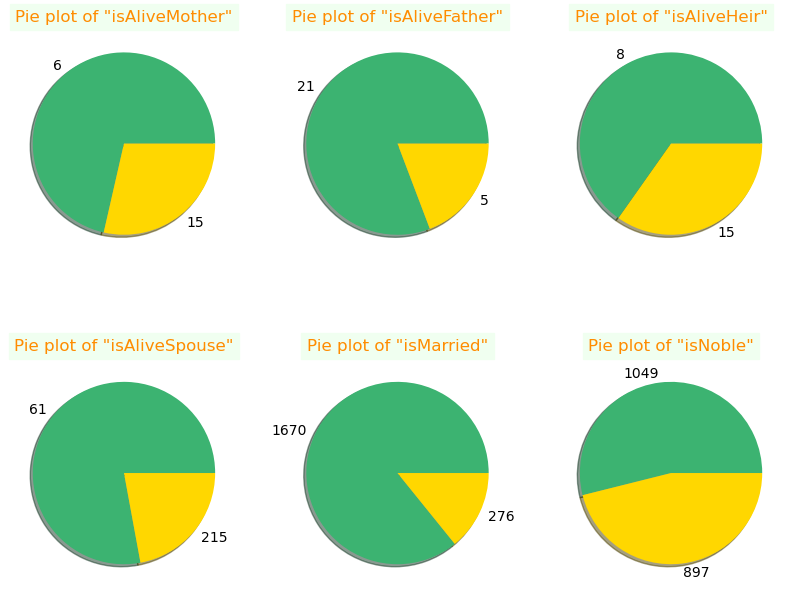

In [91]:
fig, ax = plt.subplots(figsize = (10,8),dpi=100)
ax = fig.add_axes([0,0,1,1])

df2 = df[['isAliveMother','isAliveFather','isAliveHeir','isAliveSpouse','isMarried','isNoble']]
cols = df2.columns
for i in range (0,len(df2.columns)):
    plt.subplot(2, 3, i+1)
    plt.pie(x = df2.iloc[:, i].value_counts(),colors = ['mediumseagreen','gold'],
           labels = [f'{df2.iloc[:,i].value_counts()[0]}',f'{df2.iloc[:,i].value_counts()[1]}'],
           shadow=True)
    plt.title(f'Pie plot of "{cols[i]}"', color = 'darkorange', backgroundcolor = 'honeydew') 
plt.show();


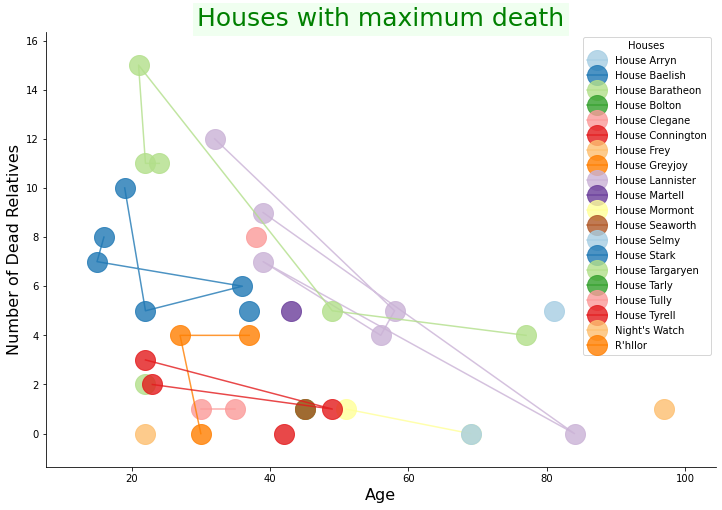

In [51]:
# groupby houeses
groups = df[df['popularity']>0.6].groupby('house')

fig, ax = plt.subplots(figsize = (12,8))
ax.margins(0.09)

color_num = 21 # number of colors
sns.reset_orig()  # get default matplotlib styles back
clrs = sns.color_palette('Paired', n_colors=color_num) # colors in our graph

i = 0 # for color
for name, group in groups:
    # for each group plotting point which represents number of Dead Relations by age
    t = ax.plot(group.age, group.numDeadRelations, marker='o', linestyle='', ms=20, label=name, alpha = 0.8)
    t[0].set_color(clrs[i])
    t[0].set_linestyle('solid')
    i += 1 # changing color
    
plt.legend(loc = 'upper right', fontsize = 10, title = 'Houses')
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Number of Dead Relatives', fontsize = 16)
plt.title('Houses with maximum death',fontsize = 25, color = 'green', backgroundcolor = 'honeydew')

sns.despine()

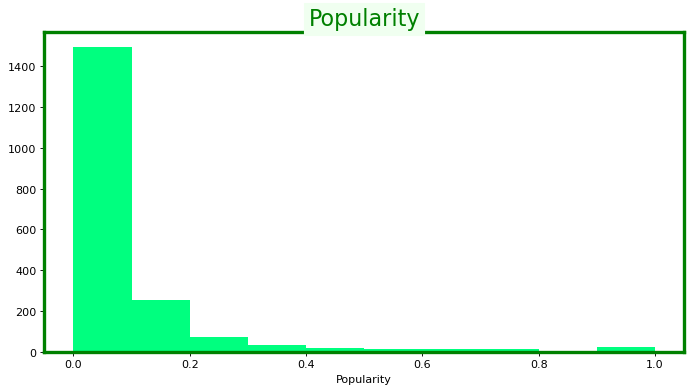

In [31]:
fig = plt.figure(figsize=(8,4), dpi=80)
ax = fig.add_axes([0,0,1,1])

p = df['popularity'].sort_values()
plt.hist(p,bins = 10, color = 'springgreen')
plt.xlabel('Popularity')
plt.title('Popularity',fontsize = 20, color = 'green', backgroundcolor = 'honeydew')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_color("green")

In [24]:
print('Most Popular characters are:\n {}'.format(df[df['popularity']==1].name))

Most Popular characters are:
 5         Tommen Baratheon
50       Joffrey Baratheon
54         Margaery Tyrell
101             Robb Stark
172      Stannis Baratheon
280      Aegon I Targaryen
296     Aerys II Targaryen
1466            Arya Stark
1474            Bran Stark
1481      Cersei Lannister
1651       Barristan Selmy
1677    Daenerys Targaryen
1688          Eddard Stark
1741       Jaime Lannister
1749              Jon Snow
1784       Renly Baratheon
1785         Theon Greyjoy
1792           Sansa Stark
1798       Tywin Lannister
1828         Petyr Baelish
1840      Tyrion Lannister
Name: name, dtype: object


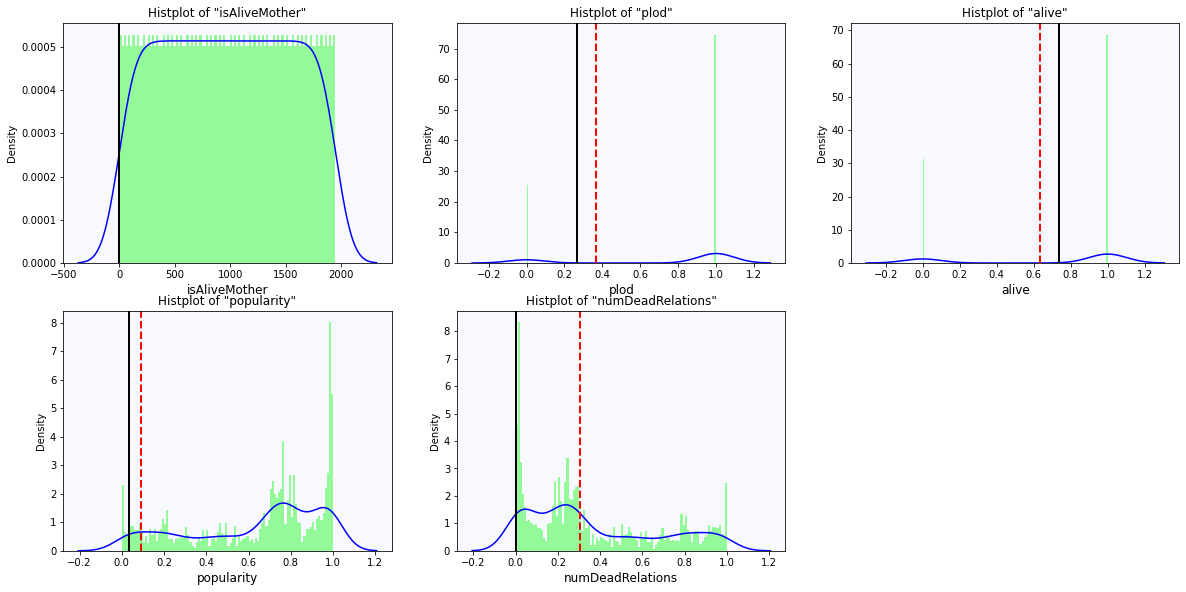

In [125]:
plt.figure(figsize = (20, 15))
df3 = df[['isAliveMother','plod','alive','popularity','numDeadRelations']]
cols = df3.columns
for i in range (0,len(df3.columns)):
    plt.subplot(3, 3, i+1, fc='ghostwhite')
    sns.distplot(x = df.iloc[:, i],bins=100,color='lime',kde_kws={"color":"b"})
    plt.axvline(df3.iloc[:, i].mean(), color='r', linestyle='dashed', linewidth=2)
    plt.axvline(df3.iloc[:, i].median(), color='k', linewidth=2)
    plt.xlabel(df3.columns[i], size = 12)
    plt.title(f'Histplot of "{cols[i]}"') 
plt.show();

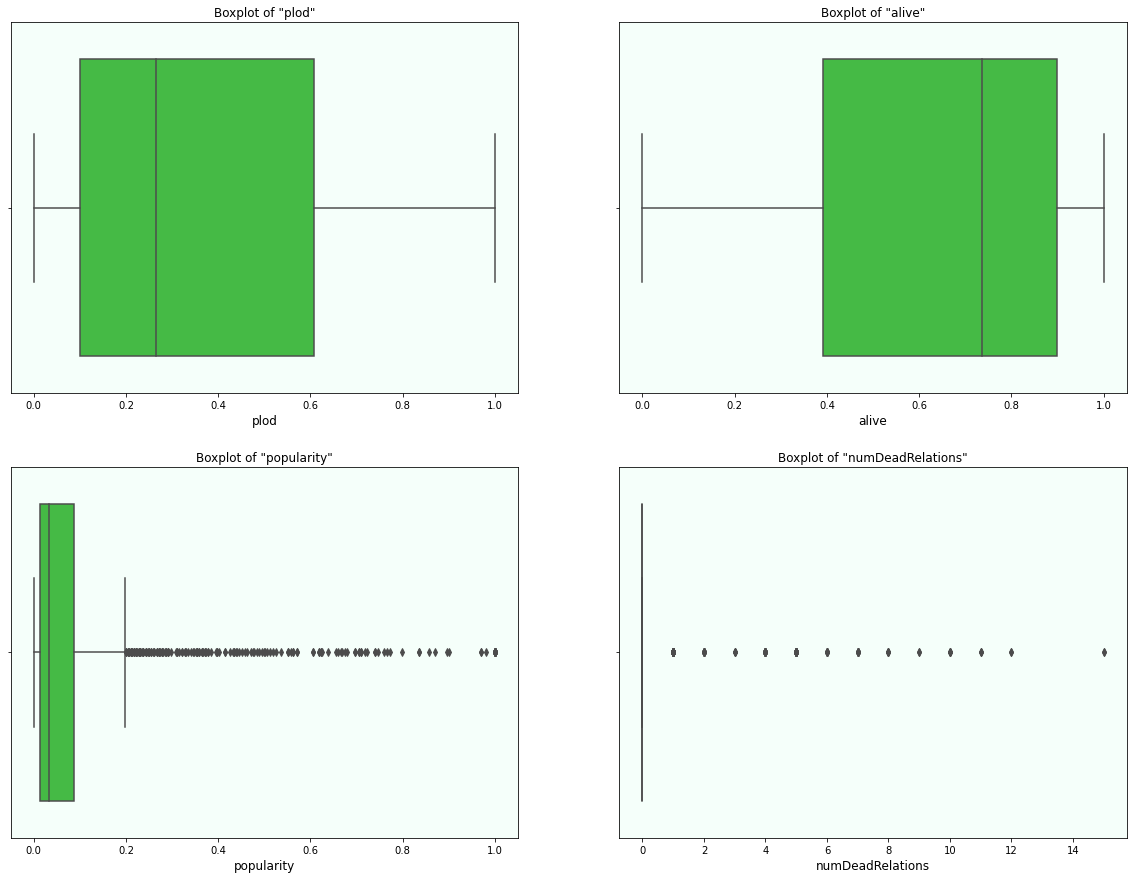

In [136]:
plt.figure(figsize = (20, 15))
df3 = df[['plod','alive','popularity','numDeadRelations']]
cols = df3.columns
for i in range (0,len(df3.columns)):
    plt.subplot(2, 2, i+1, fc='mintcream')
    sns.boxplot(x = df3.iloc[:, i], color = 'limegreen')
    plt.xlabel(df3.columns[i], size = 12)
    plt.title(f'Boxplot of "{cols[i]}"') 
plt.show();